In [1]:
print("welcome to data analysis.")

welcome to data analysis.


In [2]:
run ./scripts/analysis_scripts.py

In [3]:
minimum_path = './computational-results-minimum/results_datatable'
additive_faces_path = './computational-results-additive-faces/results_datatable'
objective_zero_path = './computational-results-objective-zero/results_datatable'
objective_one_percent_path = './computational-results-objective-one-percent/results_datatable/'

In [4]:
## delta_pi_minimum results

# path for computational results.
path = minimum_path

# generate dataframe for different statistical analysis, using parameter stats.  
df = generate_dataframe(path,stats='arithmetic_mean')

# print shifted geometric mean table with shift 60s.
shifted_gmean_df(df, s=60)

,metric,sbb_bb_constant_bound,sbb_bfs_mixed_bound,sbb_bfs_constant_bound,sbb_dfs_lp_bound,sbb_bb_lp_bound,sbb_dfs_mixed_bound,sbb_bfs_lp_bound,naive_computation,mip_solver,sbb_dfs_constant_bound,sbb_bb_mixed_bound
0,shifted_geometric_mean(shift=60),35.022006,94.622165,35.772593,133.854313,94.153868,122.905421,102.322691,90.235141,2000.215174,37.878981,84.194165


In [5]:
# performance profile plot

# write algorithms for plotting: columns = ...
# available algorithms: 'sbb_bb_constant_bound', 'sbb_bfs_mixed_bound',
#       'sbb_bfs_constant_bound', 'sbb_dfs_lp_bound', 'sbb_bb_lp_bound',
#       'sbb_dfs_mixed_bound', 'sbb_bfs_lp_bound', 'naive_computation',
#       'mip_solver', 'sbb_dfs_constant_bound', 'sbb_bb_constant_bound'
columns = ['naive_computation','sbb_bb_constant_bound','sbb_bb_mixed_bound','sbb_bb_lp_bound','mip_solver'] 
#df[columns].columns
plot_df=performance_profile_plot(df[columns],log_scale = True, tau_max = 1000)

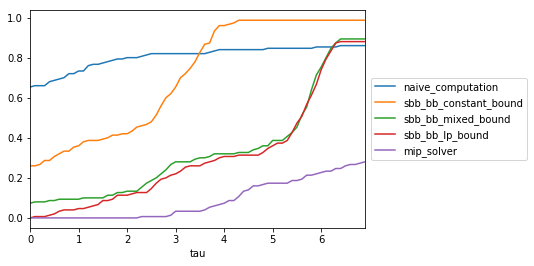

In [6]:
plt.tight_layout()
ax = plt.gca()
plot_df.plot(kind='line',x='tau',y=plot_df.columns[1:], ax=ax)
ax.legend(loc='right', bbox_to_anchor=(1.5, 0.5))
plt.show()

In [7]:
## objective_zero results

# path for computational results.
path = objective_zero_path

# generate dataframe for different statistical analysis, using parameter stats.  
df = generate_dataframe(path,stats='arithmetic_mean')

# print shifted geometric mean table with shift 60s.
shifted_gmean_df(df, s=60)

,metric,sbb_bb_constant_bound,sbb_bfs_mixed_bound,sbb_bfs_constant_bound,sbb_dfs_lp_bound,sbb_bb_lp_bound,sbb_dfs_mixed_bound,sbb_bfs_lp_bound,naive_computation,sbb_dfs_constant_bound,sbb_bb_mixed_bound
0,shifted_geometric_mean(shift=60),73.296571,116.769554,72.129057,125.318713,125.13614,116.394863,123.845649,93.060796,71.284674,116.500368


In [8]:
# performance profile plot

# write algorithms for plotting: columns = ...
# available algorithms: 'sbb_bb_constant_bound', 'sbb_bfs_mixed_bound',
#       'sbb_bfs_constant_bound', 'sbb_dfs_lp_bound', 'sbb_bb_lp_bound',
#       'sbb_dfs_mixed_bound', 'sbb_bfs_lp_bound', 'naive_computation',
#       'mip_solver', 'sbb_dfs_constant_bound', 'sbb_bb_constant_bound'
columns = ['naive_computation','sbb_bb_constant_bound','sbb_bb_mixed_bound','sbb_bb_lp_bound'] 
#df[columns].columns
plot_df=performance_profile_plot(df[columns],log_scale = True, tau_max = 1000)

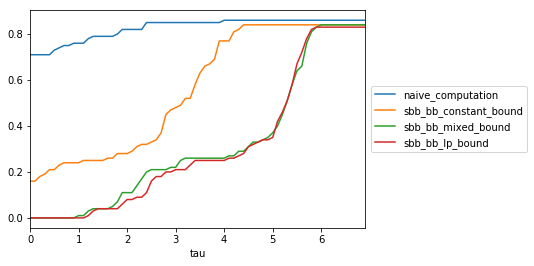

In [9]:
plt.tight_layout()
ax = plt.gca()
plot_df.plot(kind='line',x='tau',y=plot_df.columns[1:], ax=ax)
ax.legend(loc='right', bbox_to_anchor=(1.5, 0.5))
plt.show()

In [10]:
## objective_one_percent results

# path for computational results.
path = objective_one_percent_path

# generate dataframe for different statistical analysis, using parameter stats.  
df = generate_dataframe(path,stats='arithmetic_mean')

# print shifted geometric mean table with shift 60s.
shifted_gmean_df(df, s=60)

,metric,sbb_bb_constant_bound,sbb_bfs_mixed_bound,sbb_bfs_constant_bound,sbb_dfs_lp_bound,sbb_bb_lp_bound,sbb_dfs_mixed_bound,sbb_bfs_lp_bound,naive_computation,sbb_dfs_constant_bound,sbb_bb_mixed_bound
0,shifted_geometric_mean(shift=60),9.913142,9.926651,9.704636,18.457002,18.229669,9.818442,18.389217,93.183645,9.162367,9.619438


In [11]:
# performance profile plot

# write algorithms for plotting: columns = ...
# available algorithms: 'sbb_bb_constant_bound', 'sbb_bfs_mixed_bound',
#       'sbb_bfs_constant_bound', 'sbb_dfs_lp_bound', 'sbb_bb_lp_bound',
#       'sbb_dfs_mixed_bound', 'sbb_bfs_lp_bound', 'naive_computation',
#       'mip_solver', 'sbb_dfs_constant_bound', 'sbb_bb_constant_bound'
columns = ['naive_computation','sbb_bb_constant_bound','sbb_bb_mixed_bound','sbb_bb_lp_bound'] 
#df[columns].columns
plot_df=performance_profile_plot(df[columns],log_scale = True, tau_max = 1000)

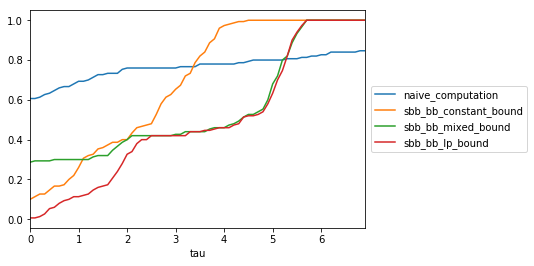

In [12]:
plt.tight_layout()
ax = plt.gca()
plot_df.plot(kind='line',x='tau',y=plot_df.columns[1:], ax=ax)
ax.legend(loc='right', bbox_to_anchor=(1.5, 0.5))
plt.show()

In [13]:
## additive_faces results

# path for computational results.
path = additive_faces_path

# generate dataframe for different statistical analysis, using parameter stats.  
df = generate_dataframe(path,stats='arithmetic_mean')

# print shifted geometric mean table with shift 60s.
shifted_gmean_df(df, s=60)


,metric,sbb_bb_constant_bound,sbb_bfs_mixed_bound,sbb_bfs_constant_bound,sbb_dfs_lp_bound,sbb_bb_lp_bound,sbb_dfs_mixed_bound,sbb_bfs_lp_bound,naive_computation,sbb_dfs_constant_bound,sbb_bb_mixed_bound
0,shifted_geometric_mean(shift=60),54.387908,165.58828,52.197121,170.005421,171.482746,166.442413,170.335285,50.057913,50.394562,166.843195


In [14]:
# performance profile plot

# write algorithms for plotting: columns = ...
# available algorithms: 'sbb_bb_constant_bound', 'sbb_bfs_mixed_bound',
#       'sbb_bfs_constant_bound', 'sbb_dfs_lp_bound', 'sbb_bb_lp_bound',
#       'sbb_dfs_mixed_bound', 'sbb_bfs_lp_bound', 'naive_computation',
#       'mip_solver', 'sbb_dfs_constant_bound', 'sbb_bb_constant_bound'
columns = ['naive_computation','sbb_bb_constant_bound','sbb_bb_mixed_bound','sbb_bb_lp_bound'] 
#df[columns].columns
plot_df=performance_profile_plot(df[columns],log_scale = True, tau_max = 1000)

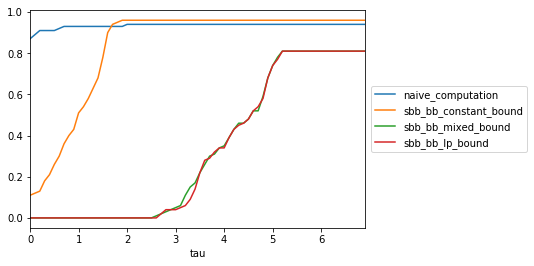

In [15]:
plt.tight_layout()
ax = plt.gca()
plot_df.plot(kind='line',x='tau',y=plot_df.columns[1:], ax=ax)
ax.legend(loc='right', bbox_to_anchor=(1.5, 0.5))
plt.show()